In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import utils.visualize as vis
import utils.data as ud
import datetime as dt
import os
from sklearn.cross_validation import train_test_split
from utils.constants import *
from utils.cnnmodel_general import CnnModel
from utils.tf import load_ckpt

In [ ]:
X_total, Y_total = ud.load_data_with_image_in_1D()
X_train, X_valid, Y_train, Y_valid = train_test_split(X_total, Y_total, test_size=VALIDATION_DATA_RATIO)

In [ ]:
X_total.shape, Y_total.shape, X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape

In [ ]:
vis.show_keypoints_on_data(X_valid[:36], Y_valid[:36])

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import tensorflow as tf
import utils.data as ud
import datetime as dt
import os
from sklearn.cross_validation import train_test_split
import utils.visualize as vis
from utils.constants import *
from utils.cnnmodel_general import CnnModel
from utils.cnnmodel_simple import CnnModel as simple_cnn_model

CHECK_POINT_DIR = TB_SUMMARY_DIR = './output/tf'

tf.set_random_seed(777)  # reproducibility

X_total, Y_total = ud.load_data_with_image_in_1D()
X_train, X_valid, Y_train, Y_valid = train_test_split(X_total, Y_total, test_size=VALIDATION_DATA_RATIO)


sess = tf.Session()
cnnmodel01 = simple_cnn_model(sess, 'SimpleCnnModel01')
cnnmodel01.summary = tf.summary.merge_all()

tf.summary.scalar("loss", cnnmodel01.cost)
last_epoch = tf.Variable(0, name='last_epoch')


sess.run(tf.global_variables_initializer())

# Create summary writer
writer = tf.summary.FileWriter(TB_SUMMARY_DIR)
writer.add_graph(sess.graph)
global_step = 0

# Saver and Restore
saver = tf.train.Saver()
checkpoint = tf.train.get_checkpoint_state(CHECK_POINT_DIR)

if checkpoint and checkpoint.model_checkpoint_path:
    try:
        saver.restore(sess, checkpoint.model_checkpoint_path)
        print("Successfully loaded:", checkpoint.model_checkpoint_path)
    except:
        print("Error on loading old network weights")
else:
    print("Could not find old network weights")


(?, 96, 96, 96) (?, 47, 47, 96) (?, 47, 47, 96)
(?, 47, 47, 192) (?, 23, 23, 192) (?, 23, 23, 192)
(?, 23, 23, 288) (?, 22, 22, 288) (?, 22, 22, 288)
hypothesis shape:  (?, 30)
INFO:tensorflow:Restoring parameters from ./output/tf/model-20
Successfully loaded: ./output/tf/model-20


In [3]:
X_test, _ = ud.load_data_with_image_in_1D(test=True)
print('Predicting {} Test Data...'.format(X_test.shape[0]))
total_output = pd.DataFrame()
Y_predicted = cnnmodel01.predict(X_test, keep_prop=1.0)

# total_output.to_csv("./output/{}/kaggle_submission_CNN_TF.csv".format(datetime), index=0, columns = ['RowId','Location'] )

sess.close()
print('Finished Predicting Test data! Checkout the output file for Kaggle submission.')

Predicting 1783 Test Data...
Finished Predicting Test data! Checkout the output file for Kaggle submission.


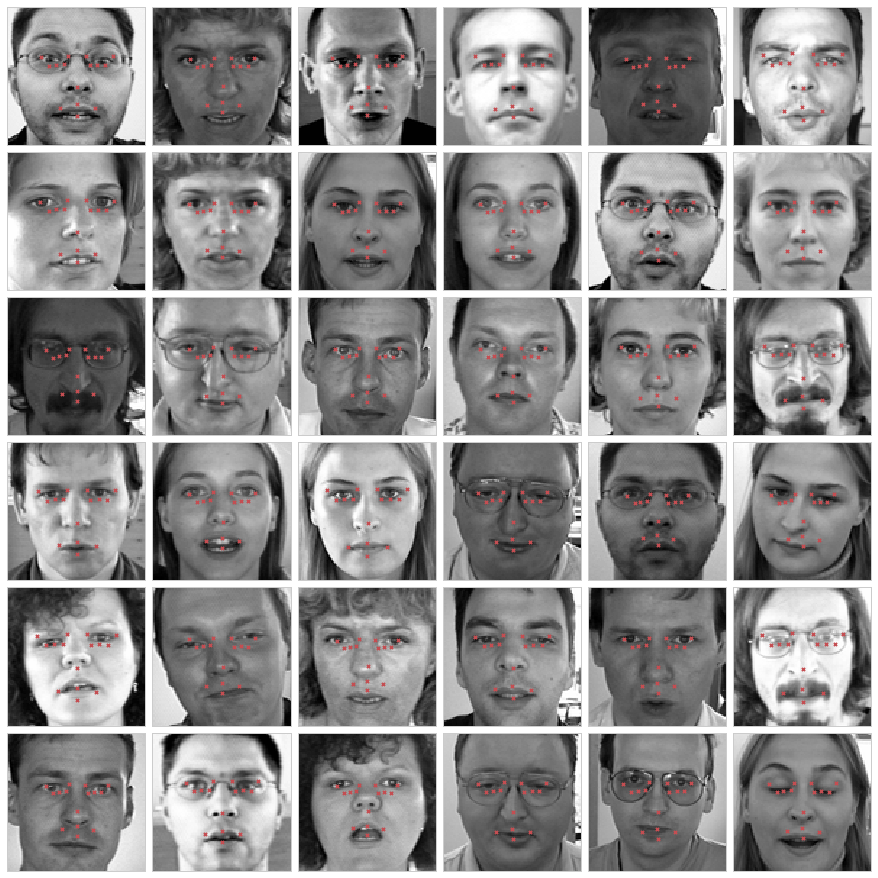

In [4]:

vis.show_keypoints_on_data(X_test[:36], Y_predicted[:36])